# <center> Assignement 2</center>


**<center>Image Processing</center>**

<center>Division of Electronics and Information Engineering</center>

<center>September 29, 2020</center>

**Purpose: To practise edge detections**

**Specifications:**

1. Write edge detection routines for Sobel Edge, Prewitt Edge and Canny Edge operators.

1) Apply Sobel Kernel `[[-1,-2,-1], [0,0,0], [1,2,1]]` and `[[-1,0,1],[-2,0,2],[-1,0,1]]` for Sobel Edges with a reasonable threshold.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

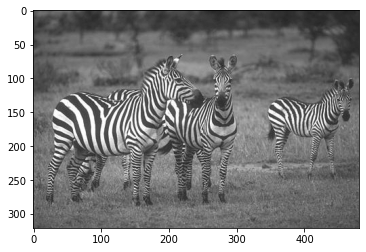

In [15]:
in_img_path = 'images/zebra.jpg'

in_img = Image.open(in_img_path)
plt.imshow(in_img, cmap='gray');

In [3]:
vertical_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
horizontal_filter = vertical_filter.T
test = vertical_filter.T

In [4]:
vertical_filter

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [5]:
horizontal_filter

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [6]:
test

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [8]:
from convolution import convolution
from gaussian import gaussian_blur, gaussian_kernel
from sobel import sobel_edge_detection

In [23]:
image = np.array(Image.open('images/zebra.jpg'))

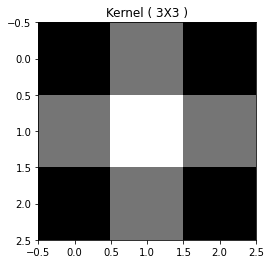

array([[0.71653131, 0.84648172, 0.71653131],
       [0.84648172, 1.        , 0.84648172],
       [0.71653131, 0.84648172, 0.71653131]])

In [21]:
kernel = gaussian_kernel(size=3, sigma=math.sqrt(3), verbose=True)
kernel

Image Shape : (321, 481)
Kernel Shape : (3, 3)


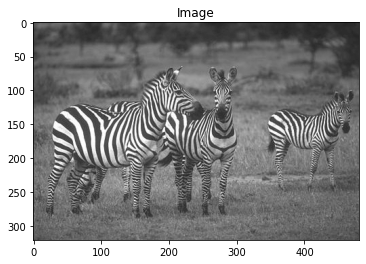

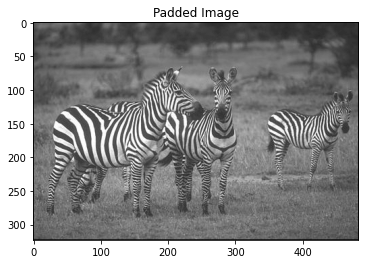

Output Image size : (321, 481)


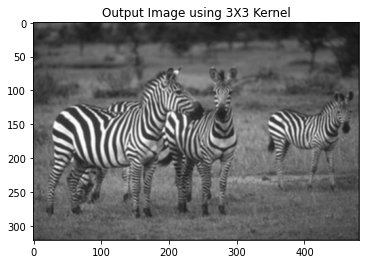

array([[287.96057291, 432.30506603, 455.60459197, ..., 277.74390526,
        272.64144705, 184.67573009],
       [413.45432188, 620.98352075, 654.2477058 , ..., 403.8353756 ,
        398.14633649, 269.9484836 ],
       [405.07231932, 608.75896081, 641.17666414, ..., 401.42588084,
        399.70934953, 272.35797836],
       ...,
       [485.31361268, 703.97278376, 700.43333859, ..., 593.55796874,
        590.33735494, 403.33222015],
       [466.02195722, 670.87391181, 660.25950063, ..., 576.88855135,
        582.59723397, 403.15118787],
       [308.80739271, 442.47430348, 432.06088437, ..., 397.64710539,
        408.60784016, 285.55500249]])

In [24]:
image = convolution(image, kernel, average=False, verbose=True)
image

Image Shape : (321, 481)
Kernel Shape : (3, 3)
Output Image size : (321, 481)


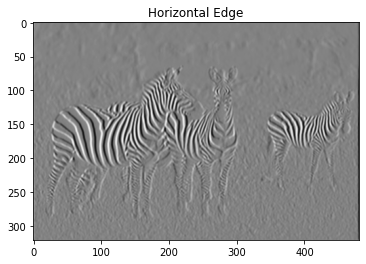

Image Shape : (321, 481)
Kernel Shape : (3, 3)
Output Image size : (321, 481)


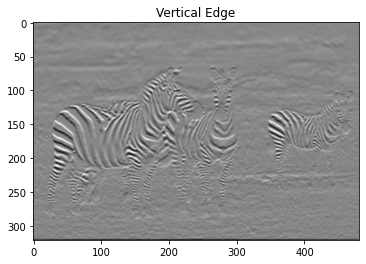

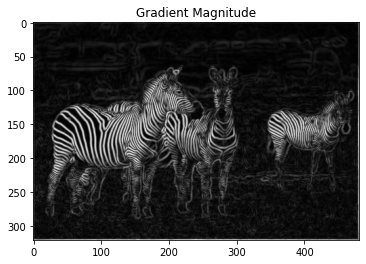

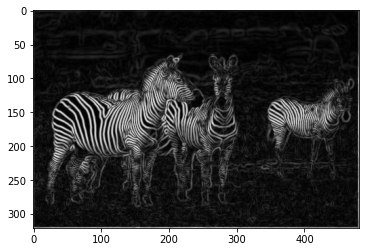

In [25]:
edge_image = sobel_edge_detection(image, vertical_filter, verbose=True)
plt.imshow(edge_image, cmap='gray');

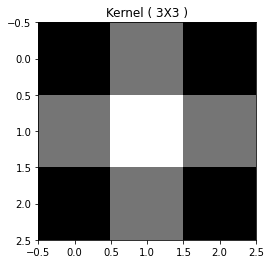

Image Shape : (321, 481)
Kernel Shape : (3, 3)


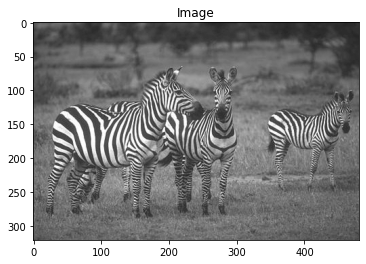

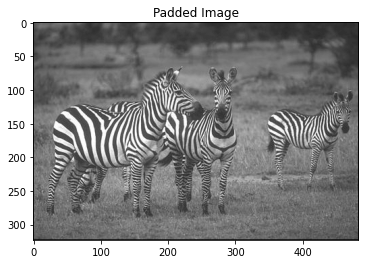

Output Image size : (321, 481)


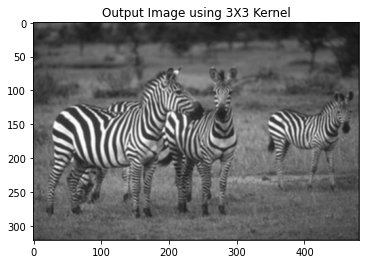

Image Shape : (321, 481)
Kernel Shape : (3, 3)
Output Image size : (321, 481)


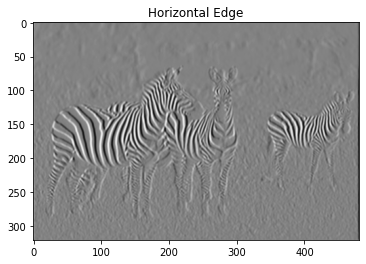

Image Shape : (321, 481)
Kernel Shape : (3, 3)
Output Image size : (321, 481)


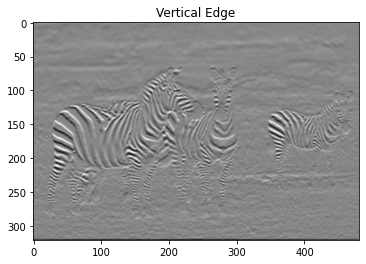

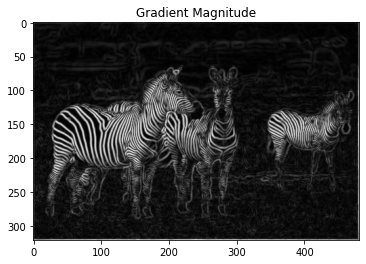

In [27]:
img = np.array(Image.open('images/zebra.jpg'))
img = gaussian_blur(img, 3, verbose=True)
edge = sobel_edge_detection(img, vertical_filter, verbose=True)

In [30]:
import cv2
import numpy as np

img = cv2.imread('images/zebra.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),math.sqrt(3))

#canny
img_canny = cv2.Canny(img,100,200)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

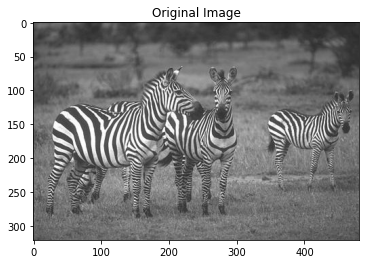

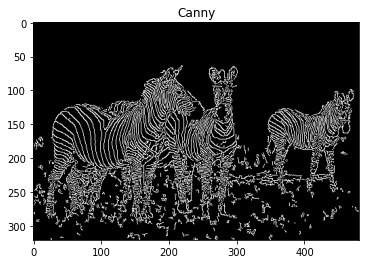

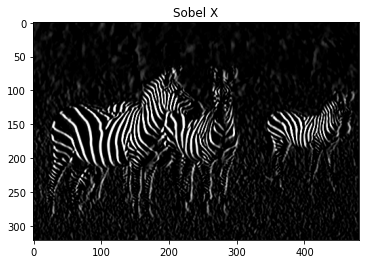

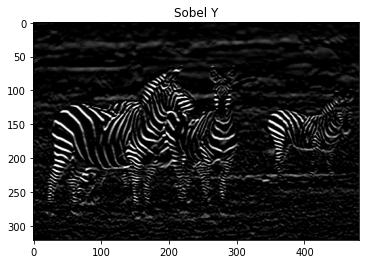

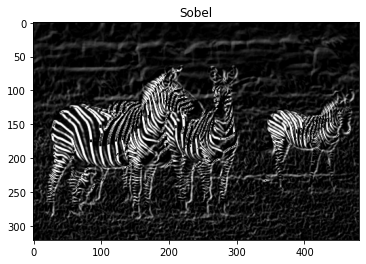

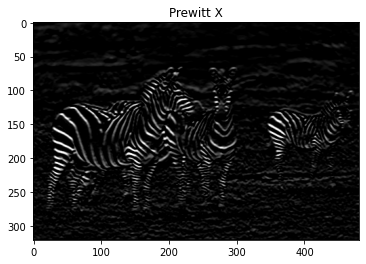

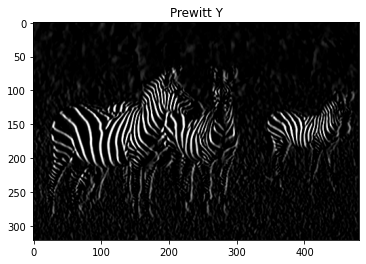

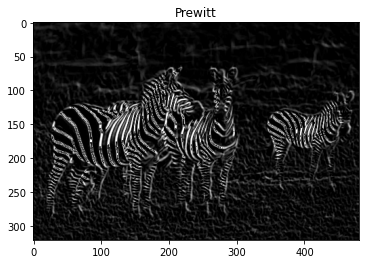

In [31]:
plt.title("Original Image")
plt.imshow(img, cmap='gray');
plt.show()

plt.title("Canny")
plt.imshow(img_canny, cmap='gray')
plt.show()

plt.title("Sobel X")
plt.imshow(img_sobelx, cmap='gray');
plt.show()
plt.title("Sobel Y")
plt.imshow(img_sobely, cmap='gray');
plt.show()
plt.title("Sobel")
plt.imshow(img_sobel, cmap='gray');
plt.show()

plt.title("Prewitt X")
plt.imshow(img_prewittx, cmap='gray');
plt.show()

plt.title("Prewitt Y")
plt.imshow(img_prewitty, cmap='gray');
plt.show()

plt.title("Prewitt")
plt.imshow(img_prewittx + img_prewitty, cmap='gray');
plt.show()

## Comparison

[[84 86 90 ... 55 54 54]
 [83 85 90 ... 55 54 54]
 [81 83 88 ... 55 55 55]
 ...
 [97 96 96 ... 81 81 80]
 [93 92 90 ... 79 80 79]
 [89 88 87 ... 80 82 82]]
Image Shape : (321, 481)
Kernel Shape : (3, 3)
Output Image size : (321, 481)
[[31.99561921 48.03389623 50.62273244 ... 30.86043392 30.29349412
  20.51952557]
 [45.9393691  68.99816897 72.69418953 ... 44.87059729 44.23848183
  29.99427596]
 [45.00803548 67.63988453 71.24185157 ... 44.60287565 44.41214995
  30.2619976 ]
 ...
 [53.92373474 78.2191982  77.82592651 ... 65.95088542 65.59303944
  44.81469113]
 [51.78021747 74.54154576 73.36216674 ... 64.09872793 64.733026
  44.79457643]
 [34.31193252 49.1638115  48.00676493 ... 44.18301171 45.40087113
  31.72833361]]


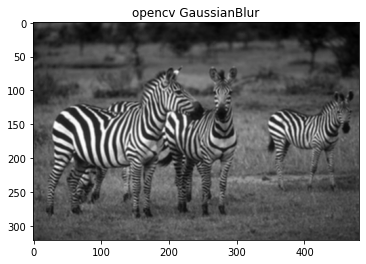

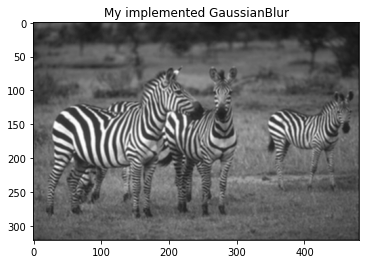

In [47]:
img = cv2.imread('images/zebra.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),math.sqrt(3))
print(img_gaussian)

my_img = np.array(Image.open('images/zebra.jpg').convert(mode='L'))
my_img_gaussian = gaussian_blur(my_img, 3, verbose=False)
print(my_img_gaussian)

plt.title("opencv GaussianBlur")
plt.imshow(img_gaussian, cmap='gray')
plt.show()

plt.title("My implemented GaussianBlur")
plt.imshow(my_img_gaussian, cmap='gray')
plt.show()


Image Shape : (321, 481)
Kernel Shape : (3, 3)
Output Image size : (321, 481)
Image Shape : (321, 481)
Kernel Shape : (3, 3)
Output Image size : (321, 481)
Image Shape : (321, 481)
Kernel Shape : (3, 3)
Output Image size : (321, 481)


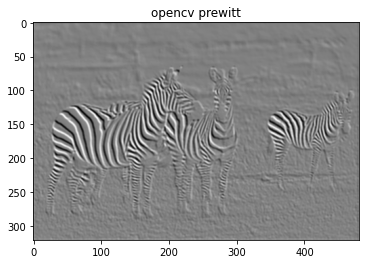

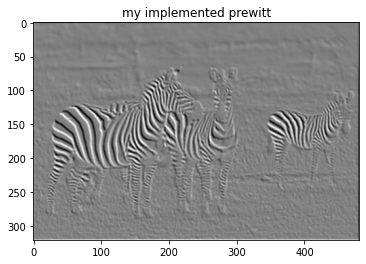

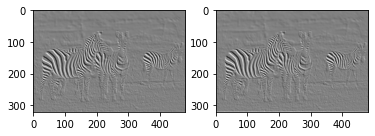

In [55]:
img_test = np.array(Image.open('images/zebra.jpg'))
img_gaussian = gaussian_blur(img_test, 3, verbose=False)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

img_conv_x = convolution(img_gaussian, kernelx, average=False, verbose=False) 
img_conv_y = convolution(img_gaussian, kernely, average=False, verbose=False) 

plt.title("opencv prewitt")
plt.imshow(img_prewittx + img_prewitty, cmap='gray');
plt.show()

plt.title("my implemented prewitt")
plt.imshow(img_conv_x + img_conv_y, cmap='gray');
plt.show()

In [50]:
from sobel import sobel_edge_detection

img_test = np.array(Image.open('images/zebra.jpg'))
sobel_edge_detection(img_test, )